In [143]:
import pandas as pd
from statistics import mean,median,stdev
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def linear_fit(v,m,c):
    return m*v +c

def getData(file):
    tab1 = pd.read_csv(file,
                    index_col=None,
                    header=None,
                    names=['Time','Pendulum_V'],
                    skiprows=9)
    if(tab1['Time'][0] != 0 and tab1['Time'][0]<0):                
        tab1['Time'] = tab1['Time'] + abs(tab1['Time'][0])
    elif(tab1['Time'][0] != 0 and tab1['Time'][0]>0):
        tab1['Time'] = tab1['Time'] - abs(tab1['Time'][0])

    return tab1

# Pendulum Calibration

## Lower Pendulum

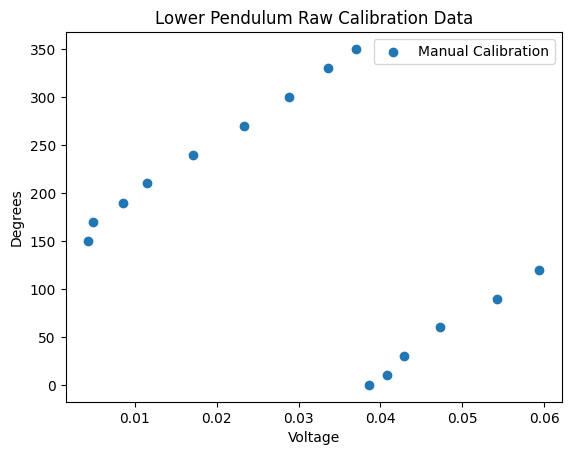

In [144]:
degrees= np.array([0,10,30,60,90,120,150, 170,190,210,240,270,300,330,350])
arr = np.array([])
for i in range(0,15,1):
    file_name = "lab3Data2/calibration/lower_pendulum_callibration"+str(i)+".csv"
    data = getData(file_name) 
    v_data = data["Pendulum_V"][:25000]
    avg = np.mean(v_data)
    arr = np.append(arr,avg)

plt.scatter(arr, degrees, label='Manual Calibration')
plt.xlabel('Voltage')
plt.ylabel('Degrees')
plt.title('Lower Pendulum Raw Calibration Data')
plt.legend()
plt.show()


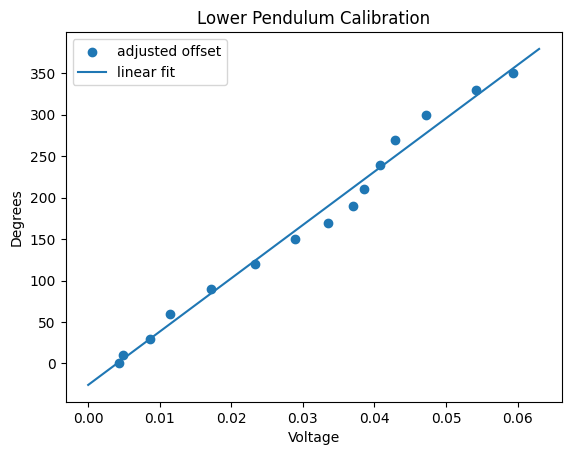

In [145]:
def off_Set_deg(arr, deg_amt):
    new_arr = arr - deg_amt
    new_arr = np.where(new_arr < 0, new_arr + 360, new_arr)
    return new_arr
degrees_offset = off_Set_deg(degrees,150)

shift_by = np.where(degrees_offset == 0)[0][0]
shift_arr = np.roll(arr,-shift_by)
plt.scatter(shift_arr,degrees,label='adjusted offset')

linearfit = curve_fit(linear_fit,shift_arr,degrees)
m = linearfit[0][0]
n = linearfit[0][1]
coef_lower = [m,n]
voltage = np.linspace(0.,0.063,100)
linearfit_lower = linear_fit(voltage,m,n)
plt.plot(voltage, linearfit_lower,label='linear fit')
plt.xlabel('Voltage')
plt.ylabel('Degrees')
plt.legend()
plt.title('Lower Pendulum Calibration')
plt.show()

## Upper Pendulum

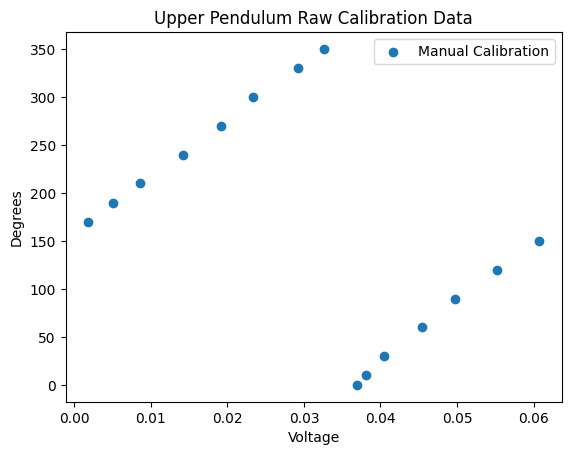

In [146]:
degrees= np.array([0,10,30,60,90,120,150, 170,190,210,240,270,300,330,350])
arr = np.array([])
for i in range(1,16,1):
    file_name = "lab3Data2/calibration/upper_pendulum_callibration"+str(i)+".csv"
    data = getData(file_name) 
    v_data = data["Pendulum_V"][:25000]
    avg = np.mean(v_data)
    arr = np.append(arr,avg)

plt.scatter(arr, degrees, label='Manual Calibration')
plt.xlabel('Voltage')
plt.ylabel('Degrees')
plt.title('Upper Pendulum Raw Calibration Data')
plt.legend()
plt.show()

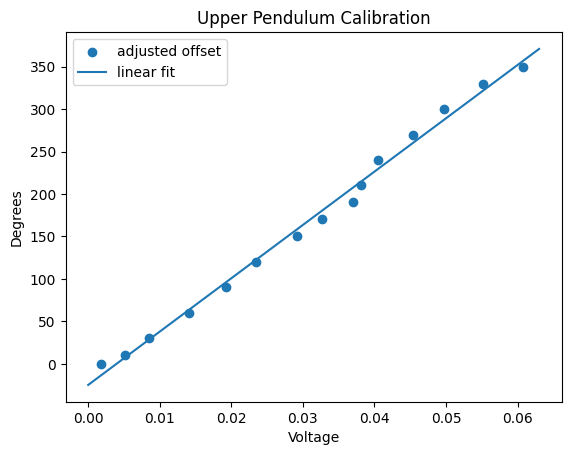

In [147]:
def off_Set_deg(arr, deg_amt):
    new_arr = arr - deg_amt
    new_arr = np.where(new_arr < 0, new_arr + 360, new_arr)
    return new_arr
degrees_offset = off_Set_deg(degrees,170)

shift_by = np.where(degrees_offset == 0)[0][0]
shift_arr = np.roll(arr,-shift_by)
plt.scatter(shift_arr,degrees,label='adjusted offset')

linearfit = curve_fit(linear_fit,shift_arr,degrees)
m = linearfit[0][0]
n = linearfit[0][1]
coef_upper = [m,n]
voltage = np.linspace(0.,0.063,100)
linearfit_lower = linear_fit(voltage,m,n)
plt.plot(voltage, linearfit_lower,label='linear fit')
plt.xlabel('Voltage')
plt.ylabel('Degrees')
plt.legend()
plt.title('Upper Pendulum Calibration')
plt.show()

In [148]:
def getExperimentData(file):
    tab1 = pd.read_csv(file,
                    index_col=None,
                    header=None,
                    names=['Time','LowerPendulum_V','UpperPendulum_V'],
                    skiprows=11)
    if(tab1['Time'][0] != 0 and tab1['Time'][0]<0):                
        tab1['Time'] = tab1['Time'] + abs(tab1['Time'][0])
    elif(tab1['Time'][0] != 0 and tab1['Time'][0]>0):
        tab1['Time'] = tab1['Time'] - abs(tab1['Time'][0])

    return tab1

def angles_data_elementwise(v_data, m, n):
    out = linear_fit(v_data, m,n)
    return out


def getAngles(file):
    repeatability = getExperimentData(file)
    t_data = np.array(repeatability["Time"][:])
    v_data_l = np.array(repeatability["LowerPendulum_V"][:])
    angles_data_l = angles_data_elementwise(v_data_l, *coef_lower)
    v_data_u = np.array(repeatability["UpperPendulum_V"][:])
    angles_data_u = angles_data_elementwise(v_data_u, *coef_upper)

    return t_data,angles_data_l, angles_data_u

## Repeatability Experiment

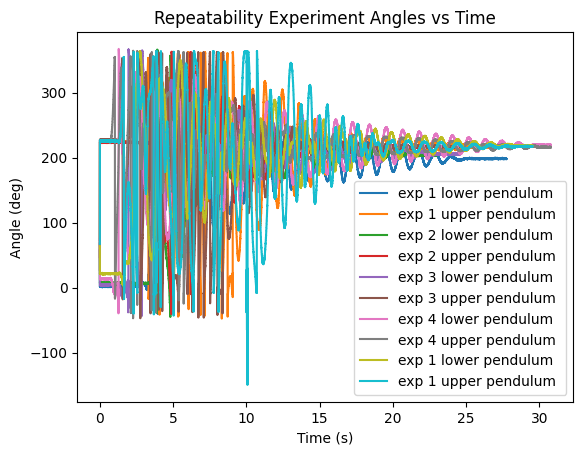

In [149]:
repeatability1 = getAngles('lab3Data2/repeatability/repeatability1.csv')
repeatability2 = getAngles('lab3Data2/repeatability/repeatability2.csv')
repeatability3 = getAngles('lab3Data2/repeatability/repeatability3.csv')
repeatability4 = getAngles('lab3Data2/repeatability/repeatability4.csv')
repeatability5 = getAngles('lab3Data2/repeatability/repeatability5.csv')

plt.plot(repeatability1[0], repeatability1[1], label = 'exp 1 lower pendulum')
plt.plot(repeatability1[0],repeatability1[2], label = 'exp 1 upper pendulum ')

plt.plot(repeatability2[0], repeatability2[1], label = 'exp 2 lower pendulum')
plt.plot(repeatability2[0],repeatability2[2], label = 'exp 2 upper pendulum ')

plt.plot(repeatability3[0], repeatability3[1], label = 'exp 3 lower pendulum')
plt.plot(repeatability3[0],repeatability3[2], label = 'exp 3 upper pendulum ')

plt.plot(repeatability4[0], repeatability4[1], label = 'exp 4 lower pendulum')
plt.plot(repeatability4[0],repeatability4[2], label = 'exp 4 upper pendulum ')

plt.plot(repeatability5[0], repeatability5[1], label = 'exp 1 lower pendulum')
plt.plot(repeatability5[0],repeatability5[2], label = 'exp 1 upper pendulum ')

plt.legend()
plt.title('Repeatability Experiment Angles vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')

plt.show()



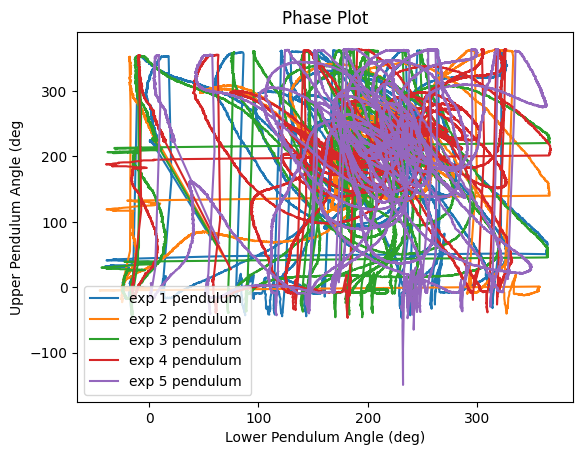

In [150]:
plt.plot(repeatability1[1], repeatability1[2], label = 'exp 1 pendulum')
plt.plot(repeatability2[1], repeatability2[2], label = 'exp 2 pendulum ')
plt.plot(repeatability3[1], repeatability3[2], label = 'exp 3 pendulum')
plt.plot(repeatability4[1], repeatability4[2], label = 'exp 4 pendulum ')
plt.plot(repeatability5[1], repeatability5[2], label = 'exp 5 pendulum')
plt.title('Phase Plot')
plt.xlabel('Lower Pendulum Angle (deg)')
plt.ylabel('Upper Pendulum Angle (deg')
plt.legend()
plt.show()

## Angular Velocity

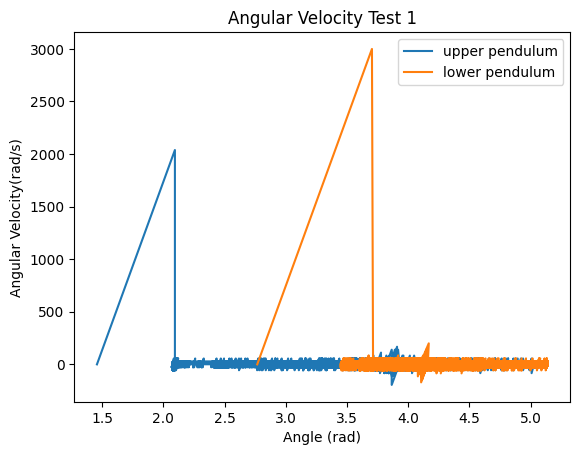

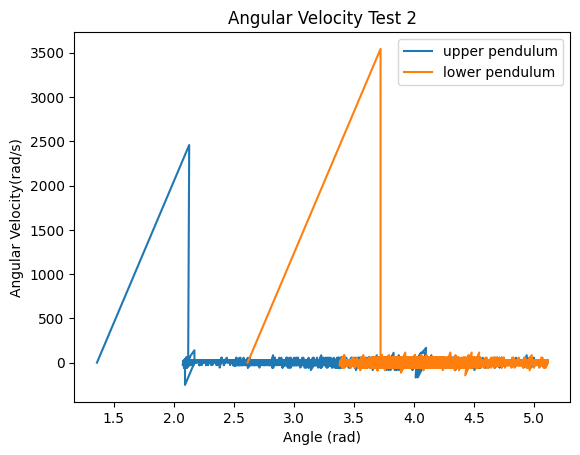

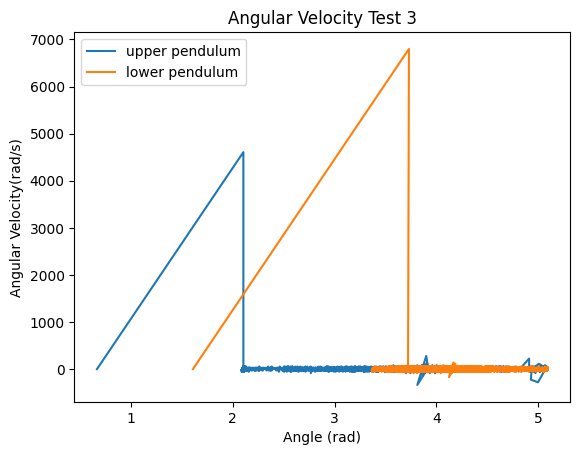

In [154]:
ang_velocity_1 = getAngles('lab3Data2/angular-velocity/angvel 01.csv')
angular_velocity_1_u =np.diff(ang_velocity_1[2]*np.pi/180)/np.diff(ang_velocity_1[0])
angular_velocity_1_l =np.diff(ang_velocity_1[1]*np.pi/180)/np.diff(ang_velocity_1[0])
angular_velocity_1_u = np.insert(angular_velocity_1_u, 0,0)
angular_velocity_1_l = np.insert(angular_velocity_1_l, 0,0)
plt.plot(ang_velocity_1[2]*np.pi/180, angular_velocity_1_u, label='upper pendulum')
plt.plot(ang_velocity_1[1]*np.pi/180, angular_velocity_1_l, label='lower pendulum')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity(rad/s)')
plt.title('Angular Velocity Test 1')
plt.legend()
plt.show()

ang_velocity_2 = getAngles('lab3Data2/angular-velocity/angvel 02.csv')
angular_velocity_2_u =np.diff(ang_velocity_2[2]*np.pi/180)/np.diff(ang_velocity_2[0])
angular_velocity_2_l =np.diff( ang_velocity_2[1]*np.pi/180)/np.diff(ang_velocity_2[0])
angular_velocity_2_u = np.insert(angular_velocity_2_u, 0,0)
angular_velocity_2_l = np.insert(angular_velocity_2_l, 0,0)
plt.plot(ang_velocity_2[2]*np.pi/180, angular_velocity_2_u, label='upper pendulum')
plt.plot(ang_velocity_2[1]*np.pi/180, angular_velocity_2_l, label='lower pendulum')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity(rad/s)')
plt.title('Angular Velocity Test 2')
plt.legend()
plt.show()

ang_velocity_3 = getAngles('lab3Data2/angular-velocity/angvel 03.csv')
angular_velocity_3_u =np.diff(ang_velocity_3[2]*np.pi/180)/np.diff(ang_velocity_3[0])
angular_velocity_3_l =np.diff( ang_velocity_3[1]*np.pi/180)/np.diff(ang_velocity_3[0])
angular_velocity_3_u = np.insert(angular_velocity_3_u, 0,0)
angular_velocity_3_l = np.insert(angular_velocity_3_l, 0,0)
plt.plot(ang_velocity_3[2]*np.pi/180, angular_velocity_3_u, label='upper pendulum')
plt.plot(ang_velocity_3[1]*np.pi/180, angular_velocity_3_l, label='lower pendulum')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity(rad/s)')
plt.title('Angular Velocity Test 3')
plt.legend()
plt.show()

## Predictability

In [152]:
def count_rotations(angle_series, units="deg"):
    θ = np.asarray(angle_series, dtype=float)
    if units == "deg":
        θ = np.deg2rad(θ)

    θ_unwrapped = np.unwrap(θ)        
    dθ = np.diff(θ_unwrapped) 

    cw = ccw = 0
    partial = 0.0
    for delta in dθ:
        partial += delta
        while partial >= 2*np.pi:      
            ccw    += 1
            partial -= 2*np.pi
        while partial <= -2*np.pi:  
            cw     += 1
            partial += 2*np.pi

    return cw, ccw

predictability1_1 = getAngles('lab3Data2/predictability/predictability1_1.csv')
predictability1_2 = getAngles('lab3Data2/predictability/predictability1_2.csv')
predictability1_3 = getAngles('lab3Data2/predictability/predictability1_3.csv')
predictability2_1 = getAngles('lab3Data2/predictability/predictability2_1.csv')
predictability2_2 = getAngles('lab3Data2/predictability/predictability2_2.csv')
predictability2_3 = getAngles('lab3Data2/predictability/predictability2_3.csv')
predictability3_1 = getAngles('lab3Data2/predictability/predictability3_1.csv')
predictability3_2 = getAngles('lab3Data2/predictability/predictability3_2.csv')
predictability3_3 = getAngles('lab3Data2/predictability/predictability3_3.csv')

rotations1_1 = [count_rotations(predictability1_1[1],'deg'), count_rotations(predictability1_1[2],'deg')]
rotations1_2 = [count_rotations(predictability1_2[1],'deg'), count_rotations(predictability1_2[2],'deg')]
rotations1_3 = [count_rotations(predictability1_3[1],'deg'), count_rotations(predictability1_3[2],'deg')]
rotations2_1 = [count_rotations(predictability2_1[1],'deg'), count_rotations(predictability2_1[2],'deg')]
rotations2_2 = [count_rotations(predictability2_2[1],'deg'), count_rotations(predictability2_2[2],'deg')]
rotations2_3 = [count_rotations(predictability2_3[1],'deg'), count_rotations(predictability2_3[2],'deg')]
rotations3_1 = [count_rotations(predictability3_1[1],'deg'), count_rotations(predictability3_1[2],'deg')]
rotations3_2 = [count_rotations(predictability3_2[1],'deg'), count_rotations(predictability3_2[2],'deg')]
rotations3_3 = [count_rotations(predictability3_3[1],'deg'), count_rotations(predictability3_3[2],'deg')]

rotations = [[rotations1_1,rotations1_2,rotations1_3],
        [rotations2_1,rotations2_2,rotations2_3],
        [rotations3_1,rotations3_2,rotations3_3]]

def build_rotation_table(data):
    rows = []
    for exp_idx, experiment in enumerate(data, start=1):
        for trial_idx, run in enumerate(experiment, start=1):
            upper, lower = run        
            rows.append({
                "experiment": exp_idx,
                "trial":      trial_idx,
                "upper_cw":   upper[0],
                "upper_ccw":  upper[1],
                "lower_cw":   lower[0],
                "lower_ccw":  lower[1],
            })

    return pd.DataFrame(rows)

print(build_rotation_table(rotations))

   experiment  trial  upper_cw  upper_ccw  lower_cw  lower_ccw
0           1      1         0          0         1          1
1           1      2         0          0         1          7
2           1      3         0          0         6          6
3           2      1         0          0         0          3
4           2      2         0          0         7          2
5           2      3         0          1         6          2
6           3      1         0          1         3          0
7           3      2         0          1         3          0
8           3      3         0          0        10          0


# Numerical Simulation

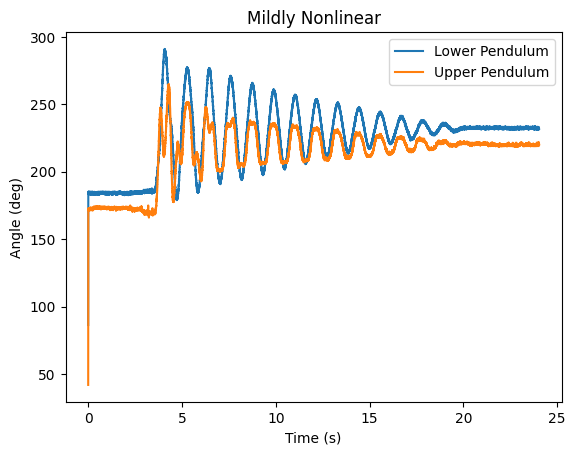

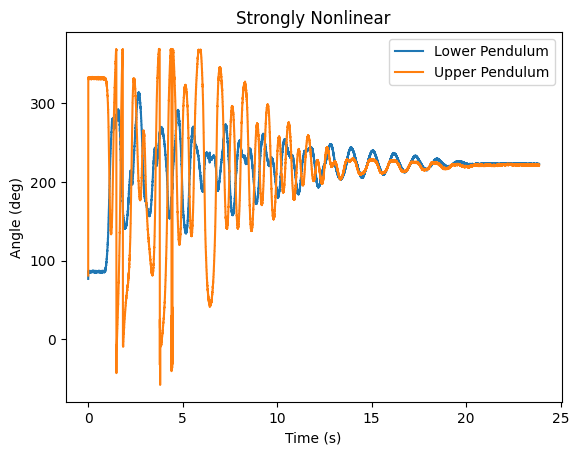

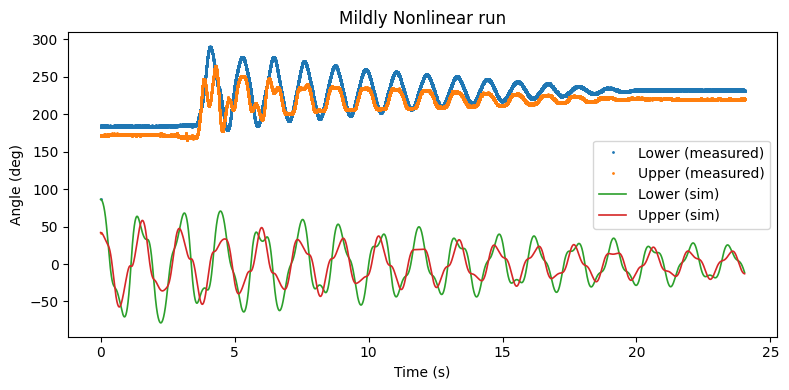

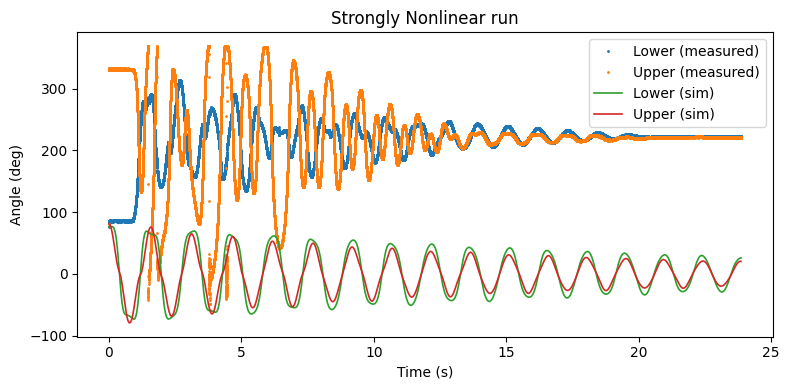

In [163]:
data_mildly = getAngles('lab3Data2/comparison/compar_1 01.csv')
data_strongly = getAngles('lab3Data2/comparison/compar_2 01.csv')


g=9.81; m1=m2=0.5; L1=L2=0.3; c1=c2=0.05

plt.plot(data_mildly[0],data_mildly[1], label = 'Lower Pendulum')
plt.plot(data_mildly[0],data_mildly[2], label = 'Upper Pendulum')
plt.title('Mildly Nonlinear')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.legend()
plt.show()

plt.plot(data_strongly[0],data_strongly[1], label = 'Lower Pendulum')
plt.plot(data_strongly[0],data_strongly[2], label = 'Upper Pendulum')
plt.title('Strongly Nonlinear')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.legend()
plt.show()

def double_pendulum_rhs_damped(t, y, m1, m2, L1, L2, g, c1, c2):
    θ1, ω1, θ2, ω2 = y
    Δ = θ2 - θ1

    den1 = (m1 + m2) * L1 - m2 * L1 * np.cos(Δ)**2
    den2 = (L2 / L1) * den1

    # undamped accelerations
    α1 = (
        m2 * L1 * ω1**2 * np.sin(Δ) * np.cos(Δ)
        + m2 * g * np.sin(θ2) * np.cos(Δ)
        + m2 * L2 * ω2**2 * np.sin(Δ)
        - (m1 + m2) * g * np.sin(θ1)
    ) / den1

    α2 = (
        -m2 * L2 * ω2**2 * np.sin(Δ) * np.cos(Δ)
        + (m1 + m2) * (
            g * np.sin(θ1) * np.cos(Δ)
            - L1 * ω1**2 * np.sin(Δ)
            - g * np.sin(θ2)
        )
    ) / den2

    α1 -= c1 * ω1       
    α2 -= c2 * ω2

    return ω1, α1, ω2, α2


def simulate(
    t_span, y0, m1, m2, L1, L2, g, c1, c2, n_points=None, atol=1e-9, rtol=1e-9
):
    if n_points is None:
        n_points = 1501
    t_eval = np.linspace(t_span[0], t_span[1], n_points)

    sol = solve_ivp(
        double_pendulum_rhs_damped,
        t_span,
        y0,
        t_eval=t_eval,
        atol=atol,
        rtol=rtol,
        args=(m1, m2, L1, L2, g, c1, c2),
    )
    return sol.t, sol.y  # θ1, ω1, θ2, ω2

def compare_data_vs_model(csv_file, params, plot_title=""):
    t_exp, θ_low_exp_deg, θ_up_exp_deg = getAngles(csv_file)
    θ1_0_deg = θ_up_exp_deg[0]
    θ2_0_deg = θ_low_exp_deg[0]
    y0 = (
        np.deg2rad(θ1_0_deg), 0.0,          # θ1, ω1
        np.deg2rad(θ2_0_deg), 0.0           # θ2, ω2
    )
    t_sim, (θ1, _, θ2, _) = simulate(
        (0, t_exp[-1]),
        y0,
        **params,
        n_points=len(t_exp)
    )

    plt.figure(figsize=(8, 4))
    plt.plot(t_exp, θ_low_exp_deg,  ".", ms=2, label="Lower (measured)")
    plt.plot(t_exp, θ_up_exp_deg,   ".", ms=2, label="Upper (measured)")
    plt.plot(t_sim, np.rad2deg(θ2), "-", lw=1.2, label="Lower (sim)")
    plt.plot(t_sim, np.rad2deg(θ1), "-", lw=1.2, label="Upper (sim)")
    plt.xlabel("Time (s)")
    plt.ylabel("Angle (deg)")
    plt.title(plot_title or csv_file)
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # physical parameters you measured
    params = dict(
        m1 = 0.50,     
        m2 = 0.50,      
        L1 = 0.30,      
        L2 = 0.30,      
        g  = 9.81,      
        c1 = 0.2,     #upper
        c2 = 0,       # lower
    )

    # list of comparison runs
    files = [
        "lab3Data2/comparison/compar_1 01.csv",
        "lab3Data2/comparison/compar_2 01.csv",
    ]

    titles = ["Mildly Nonlinear run", "Strongly Nonlinear run"]
    for f, ttl in zip(files, titles):
        compare_data_vs_model(f, params, ttl)